In [ ]:
#In this notebook, I clean and wrangle the data I need to put together my movie recommender

import pandas as pd
import time
import sys

In [ ]:
#examining the ratings dataset

ratings= pd.read_csv('/content/drive/MyDrive/Datasets/ml-latest/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [ ]:
#examining the movies dataset

movies= pd.read_csv('/content/drive/MyDrive/Datasets/ml-latest/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int64 
 1   title    58098 non-null  object
 2   genres   58098 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [ ]:
#cleaning movies dataset

#splitting genres into distinct values
movies['genres'] = movies['genres'].str.split('|')

#adding year column to dataset
movies['year']=movies['title'].str[-5:-1]

#drop the movies without year in title
movies=movies[(movies['title'].str[-1]==')')&(movies['title'].str[-6]=='(')]
movies.year=pd.to_numeric(movies.year)

movies=movies.set_index('movieId')
movies.sort_values('year').head()

,title,genres,year
movieId,,,
148054,Passage de Venus (1874),[Documentary],1874
148048,Sallie Gardner at a Gallop (1878),[(no genres listed)],1878
166800,Buffalo Running (1883),[(no genres listed)],1883
148040,Man Walking Around a Corner (1887),[(no genres listed)],1887
148042,Accordion Player (1888),[Documentary],1888


In [ ]:
genres = movies.reset_index().set_index(['movieId','title','year'])['genres'].apply(pd.Series).stack()
genres = genres.reset_index()
genres.columns=['movieId','title','year','level','genres']
genres.to_csv('/content/drive/MyDrive/Datasets/ml-latest/genres.csv')
print('Available Genres: ',genres.genres.unique())
genres.head()

Available Genres:  ['Adventure' 'Animation' 'Children' 'Comedy' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Mystery' 'Sci-Fi' 'IMAX'
 'Documentary' 'War' 'Musical' 'Western' 'Film-Noir' '(no genres listed)']


,movieId,title,year,level,genres
0,1,Toy Story (1995),1995,0,Adventure
1,1,Toy Story (1995),1995,1,Animation
2,1,Toy Story (1995),1995,2,Children
3,1,Toy Story (1995),1995,3,Comedy
4,1,Toy Story (1995),1995,4,Fantasy


In [ ]:
df = pd.merge(ratings,movies,on='movieId')
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
"""Great Performances"" Cats (1998)",2.815556,225
#1 Cheerleader Camp (2010),2.777778,9
#Captured (2017),2.500000,1
#Horror (2015),2.078947,19
#SCREAMERS (2016),2.500000,1


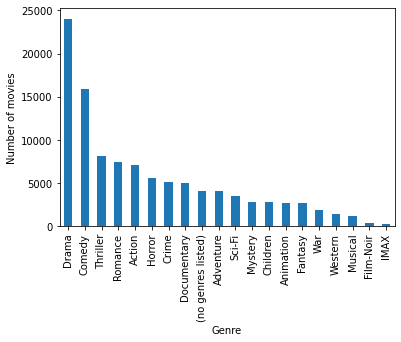

In [ ]:
sep['genres'].value_counts().plot(kind='bar')
plt.ylabel('Number of movies')
plt.xlabel('Genre')
plt.show()

In [ ]:
print('there are ' + str(sum(movies['title'].value_counts()>1)) + ' movies with the same title')

there are 78 movies with the same title


In [ ]:
movies['title'].value_counts().head(78)

Truth (2015)                           2
War of the Worlds (2005)               2
Ecstasy (2011)                         2
Eros (2004)                            2
Office (2015)                          2
                                      ..
20,000 Leagues Under the Sea (1997)    2
Casanova (2005)                        2
Interrogation (2016)                   2
Macbeth (2015)                         2
Another World (2014)                   2
Name: title, Length: 78, dtype: int64

In [ ]:
r.rating.value_counts()

4.0    7394710
3.0    5515668
5.0    4071135
3.5    3404360
4.5    2373550
2.0    1850627
2.5    1373419
1.0     886233
0.5     442388
1.5     441354
Name: rating, dtype: int64

In [ ]:
List=[]
for i in np.arange(4,5.5, 0.5):
    M=movies.loc[r[r.rating==i].movieId.value_counts().head(10).index,'title']
    print('Rate: %f' %i)
    print(M)
    print(' ')

Rate: 4.000000
593              Silence of the Lambs, The (1991)
356                           Forrest Gump (1994)
480                          Jurassic Park (1993)
457                          Fugitive, The (1993)
1                                Toy Story (1995)
296                           Pulp Fiction (1994)
318              Shawshank Redemption, The (1994)
260     Star Wars: Episode IV - A New Hope (1977)
2571                           Matrix, The (1999)
589             Terminator 2: Judgment Day (1991)
Name: title, dtype: object
 
Rate: 4.500000
318                      Shawshank Redemption, The (1994)
2571                                   Matrix, The (1999)
2959                                    Fight Club (1999)
296                                   Pulp Fiction (1994)
4993    Lord of the Rings: The Fellowship of the Ring,...
356                                   Forrest Gump (1994)
7153    Lord of the Rings: The Return of the King, The...
5952        Lord of the Rings: The 